# Análisis de Ventas

Importamos librerias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Unión de archivos
Union de los 12 archivos mensuales en un unico dataframe
Primero se toma todos los archivos con un 

In [2]:
df = pd.read_csv('.Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv')

df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Se listan los archivos a unir y se une usando un bucle

In [3]:
files = [file for file in os.listdir ('D:/Drive/MasterD/Datos varios/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_data = pd.concat([all_data, df])
    
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Se crea un archivo para la comprobación y futura lectura si fuese necesario

In [5]:
all_data.to_csv('all_data.csv', index = False)

### Limpieza de datos

Al ver que existen datos nulos, se deben limpiar.

In [6]:
nan_df = all_data[all_data.isna()]
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Existen un total de 545 datos nulos en cada columna, por lo que se eliminan las filas completas.

In [7]:
all_data = all_data.dropna()

In [8]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Se comprueba que no queda ningun data nulo.
Aun así, aparece un fallo al querrer cambiar el tipo de dato en la columna Month.
Aparece: ValueError: invalid literal for int() with base 10: 'Or'
Por lo que existe algun tipo de texto en la columna Order Date.

Por lo que se busca cual es el fallo y se limpia.

In [9]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Se observa que se han creado varias filas con los nombres de las columnas.
Por lo que se deben de eliminar de Data Frame.


In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Añadir una columna extra para el mes

Se toman los primero digitos de la columna "Order Date" para tomar el mes.


In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2] #Se crea la columna y se toman los dos primeros numeros
all_data['Month'] = all_data ['Month'].astype('int') #Dado que se toma como String , se convierte a Integer
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Añadir una columna para ventas


In [12]:
# Primero se convierten las columnas en Int para poder multiplicarlos.
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
# Se crea la columna
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### ¿Cual fue el mejor mes en en ventas? ¿Cuanto se gano en el mes?

In [13]:
# Se agrupa por group by y luego se suma los valores.
results = all_data.groupby('Month').sum()
results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


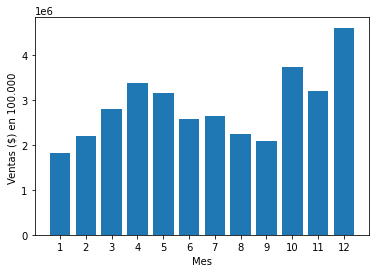

In [14]:
# Se muestra en grafica para mejor visualización
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Mes')
plt.ylabel('Ventas ($) en 100.000 ')

plt.show()

Se observa que el mes con mayor ventas es Diciembre con 4.613.443 $

### ¿Que ciudad tiene un mayor número de ventas?

Para ello se debe crear la columna ciudad.
Se obtiene el valor de la columna Purchase Address.
Para evitar posibles errores, se toma la ciudad y acronimo del estado, sin tomar el código postal.

In [15]:
# Divide la columna en secciones divididas por (,) y obtiene la segunda sección [1].
def get_city(address):
    return address.split(',')[1]

# Igual que la anterior pero con la tercera sección, pero eliminando el codigo postal.
def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data ['Purchase Address'].apply(lambda x: get_city(x) + ' , ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas , TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston , MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA"


In [16]:
# Se agrupa por group by y luego se suma los valores.
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta , GA",16602,2.779908e+06,104794,2.795499e+06
"Austin , TX",11153,1.809874e+06,69829,1.819582e+06
"Boston , MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas , TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles , CA",33289,5.421435e+06,208325,5.452571e+06
"New York City , NY",27932,4.635371e+06,175741,4.664317e+06
"Portland , ME",2750,4.471893e+05,17144,4.497583e+05
"Portland , OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco , CA",50239,8.211462e+06,315520,8.262204e+06


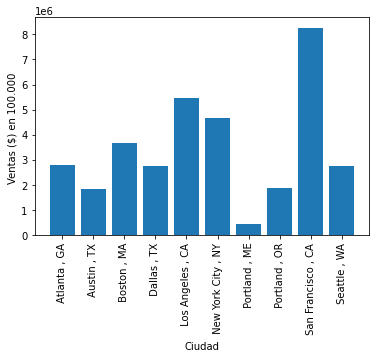

In [17]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel('Ciudad')
plt.ylabel('Ventas ($) en 100.000 ')

plt.show()

Se observa que las ciudad de San Francisco es la ciudad con mayor ventas con 8.262.204 $

### ¿En que horario debe la empresa publicitar sus productos para que haya payor posibilidad de compra?



In [18]:
#Para ello, se convierte la columna Order Date, en formaro dia y tiempo.
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [19]:
# Se crea dos columna nuevas, para Hora y Minuto
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas , TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston , MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA",9,27


<function matplotlib.pyplot.show(close=None, block=None)>

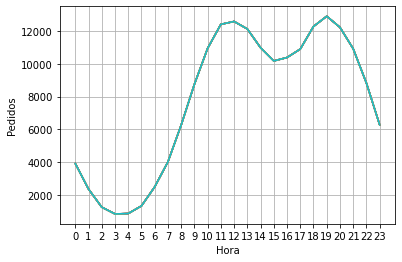

In [20]:
#
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hora')
plt.ylabel('Pedidos')
plt.show

Los picos de pedido se encuentra entre las 11:00-13:00 y las 18:00-20:00

### ¿Que productos tienen mas posibilidades de venderse juntos?
Se utilizan el Order ID para buscar los duplicados

In [21]:
# Se crea un nuevo dataframe solo con los datos que tengas duplicados el Order ID
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA",14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA",19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles , CA",19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston , MA",11,31


In [22]:
# Ahora que solo existen los duplicados, se añade otra columna para albergar segun el Order ID el nombre del producto

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()


<ipython-input-22-a8e297b2b0c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA",14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA",14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA",19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles , CA",19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston , MA",11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [23]:
# Se eliminan las filas duplicadas
df = df[['Order ID','Grouped']].drop_duplicates()

df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [24]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # 2 para ver los pares de productos

    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [25]:
# Y para ver los productos que se venden más en conjuntos de 3

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) 

    
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### ¿Que producto se vendió más? ¿Por que?

In [26]:
# Se observa el dataframe

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas , TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston , MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles , CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles , CA",9,27


In [53]:
# Se suman los productos con la cantidad ordenada.

product_group = all_data.groupby('Product')

product_quantity = product_group.sum()['Quantity Ordered']

product_quantity.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

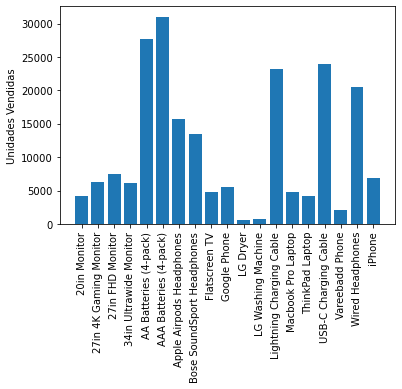

In [54]:
products = [product for product, df in product_group]


plt.bar(products,product_quantity)
plt.xticks(products, rotation='vertical')
plt.ylabel('Unidades Vendidas')
plt.show()


Se puede visualizar que los productos más vendidos, corresponden a los más baratos.
Para comprobarlo se realiza una grafica.

In [55]:
# Se agrupa los productos y re realiza la media del precio por producto.
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-84-c8ec756c040f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= 'vertical')


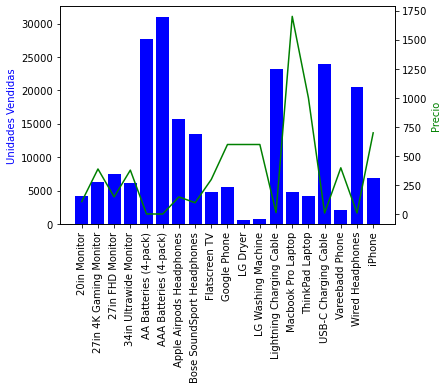

In [84]:
# Se crea una grafica que muestre la cantidad de pedidos de los productos comparado con el precio medio de los productos

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, product_quantity, color='b' )
ax2.plot(products, prices, '-g')

ax1.set_ylabel('Unidades Vendidas', color='b')
ax2.set_ylabel('Precio', color='g')
ax1.set_xticklabels(products, rotation= 'vertical')

plt.show()

Se observa que tienen una cierta correlación